# Splines

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Symbolic examples with SymPy

Probably not a good idea, but...  It's nice to *see* the equations sometimes.

### A quadratic example

In class we discussed the interpolation of the data $\{(0,0),(1,-1),(3,2)\}$. Coming up with the system is not too bad but solving it is a bit of a pain. Here's how to automate the procedure.

In [2]:
import sympy

a1,b1,c1, a2,b2,c2, m,x = sympy.symbols('a1,b1,c1, a2,b2,c2, m,x')
def S1(x): return a1*x**2 + b1*x + c1
def S2(x): return a2*x**2 + b2*x + c2
eqs = [S1(0), S1(1)+1, S2(1)+1, S2(3)-2, \
       sympy.diff(S1(x)-S2(x),x).subs(x,1), \
       sympy.diff(S1(x),x).subs(x,0) - m  # The slope at the left is still arbitrary
      ]
eqs

[c1,
 a1 + b1 + c1 + 1,
 a2 + b2 + c2 + 1,
 9*a2 + 3*b2 + c2 - 2,
 2*a1 - 2*a2 + b1 - b2,
 b1 - m]

Note that when expressions appear in a `solve` expression, `solve` assumes we want them to be zero. Thus, for example, `S(1)+1` expresses that we want `S(1)==-1`. 

Here's how we solve them:

In [3]:
solution = sympy.solve(eqs)
solution

{c1: 0, b1: m, a2: m/2 + 7/4, a1: -m - 1, c2: 3*m/2 + 11/4, b2: -2*m - 11/2}

Note that we've expressed the solution in terms of `m`. Thus, we can plot the solution in terms of `m`.

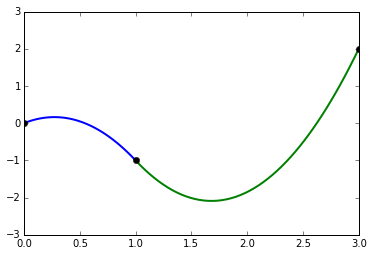

In [4]:
from ipywidgets import interact
SS1 = sympy.lambdify((x,m), S1(x).subs(solution))
SS2 = sympy.lambdify((x,m), S2(x).subs(solution))

xs1 = np.linspace(0,1)
xs2 = np.linspace(1,3)
def pic(m=0):
    ys1 = SS1(xs1,m)
    plt.plot(xs1,ys1, linewidth=2)
    ys2 = SS2(xs2,m)
    plt.plot(xs2,ys2, linewidth=2)
    ax = plt.gca()
    ax.set_ylim(-3,3)
    plt.plot([0,1,3],[0,-1,2], 'ok')
interact(pic, m=(-4,4,0.05))

### A natural cubic

While were at it, let's do a *natural* cubic with the same data.

In [5]:
a1,b1,c1,d1, a2,b2,c2,d2, x = sympy.symbols('a1,b1,c1,d1, a2,b2,c2,d2, x')
def S1(x): return a1*x**3 + b1*x**2 + c1*x + d1
def S2(x): return a2*x**3 + b2*x**2 + c2*x + d2
eqs = [S1(0), S1(1)+1, S2(1)+1, S2(3)-2, \
       sympy.diff(S1(x)-S2(x),x).subs(x,1), \
       sympy.diff(S1(x)-S2(x),x,2).subs(x,1), \
       sympy.diff(S1(x),x,2).subs(x,0),  # Natural cubic means that these
       sympy.diff(S2(x),x,2).subs(x,3)   # second derivatives are zero.
      ]
solution = sympy.solve(eqs)
solution

{c1: -17/12, b1: 0, a2: -5/24, d1: 0, a1: 5/12, d2: 5/8, b2: 15/8, c2: -79/24}

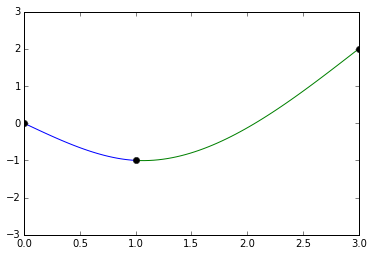

In [6]:
SS1 = sympy.lambdify((x), S1(x).subs(solution))
SS2 = sympy.lambdify((x), S2(x).subs(solution))

xs1 = np.linspace(0,1)
xs2 = np.linspace(1,3)
ys1 = SS1(xs1)
plt.plot(xs1,ys1)
ys2 = SS2(xs2)
plt.plot(xs2,ys2)
ax = plt.gca()
ax.set_ylim(-3,3)
plt.plot([0,1,3],[0,-1,2], 'ok')


## Using SciPy

This probably *is* a good idea! We're going to play with some slightly more complicated data using both the interpolating polynomial (via `lagrange`) and an interpolating spline (via `interp1d`). Both of these functions are in the `scipy.interpolate` module.

In [8]:
from scipy.interpolate import interp1d, lagrange
data = [(0,8),(1,6),(3,5),(4,3),(6,2),(8,0)]

### The interpolating polynomial
Not too bad, but it does get a little crazy at the end.

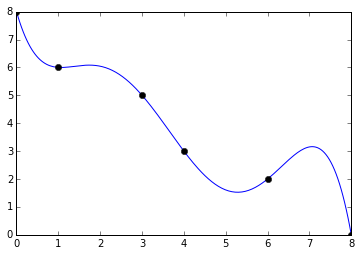

In [9]:
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]
x_min = x_data[0]
x_max = x_data[-1]
p = lagrange(x_data,y_data)
xs = np.linspace(x_min,x_max,200)
ys = p(xs)
plt.plot(xs,ys)
plt.plot(x_data,y_data,'ok')

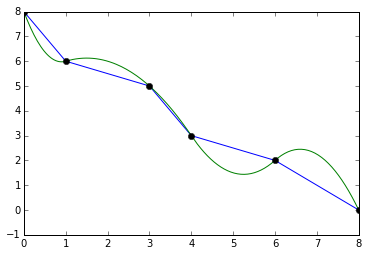

In [10]:
f1 = interp1d(x_data,y_data, kind=1)
ys1 = f1(xs)
plt.plot(xs,ys1)
f2 = interp1d(x_data,y_data, kind=2)
ys2 = f2(xs)
plt.plot(xs,ys2)
plt.plot(x_data,y_data,'ok')

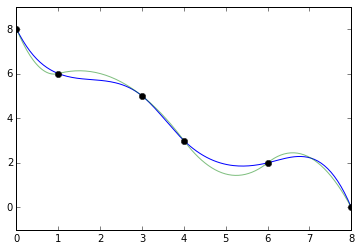

In [11]:
f3 = interp1d(x_data,y_data, kind=3)
ys3 = f3(xs)
plt.plot(xs,ys3)
f2 = interp1d(x_data,y_data, kind=2)
ys2 = f2(xs)
plt.plot(xs,ys2, alpha=0.5)
plt.plot(x_data,y_data,'ok')